79.60519091923152
5
72.40071321933132
10
69.31801256542458
20
44.41691555068069
40
43.75359089752083
80
14.692445440323556
160
13.825099333098196
320
12.015001190638806
640
10.521857993355662
1280
8.910968735852194
2560
8.256973454387165
5120
7.408679100643593
10240


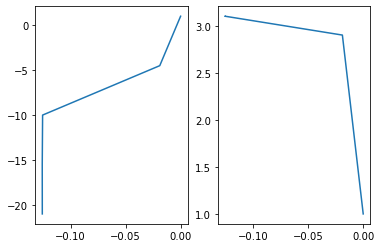

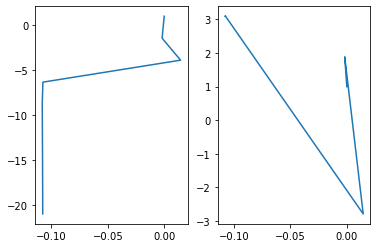

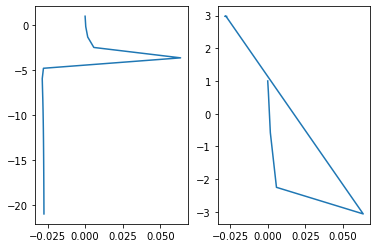

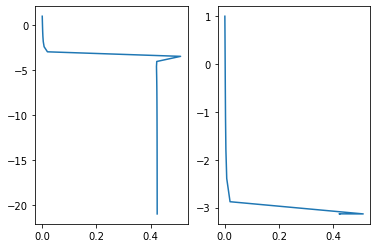

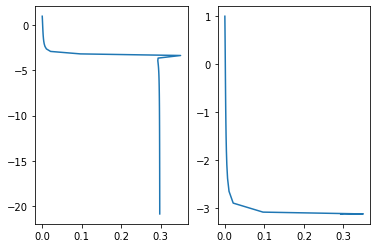

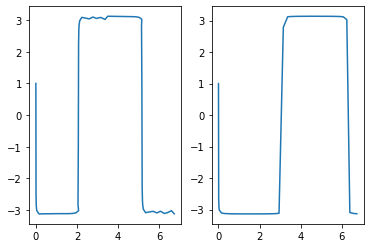

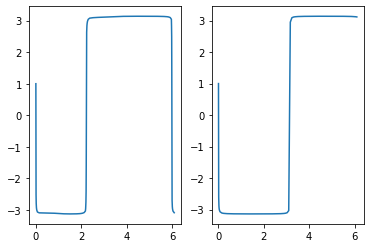

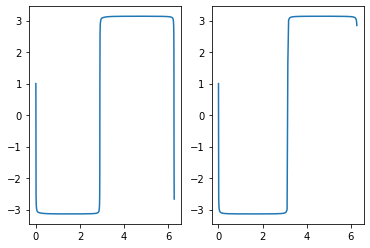

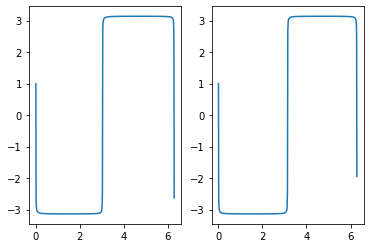

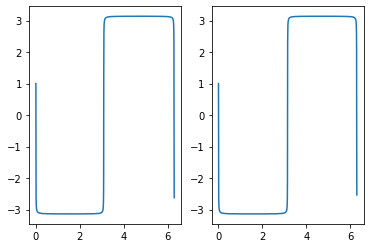

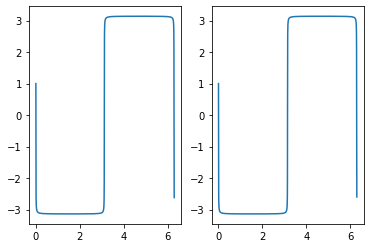

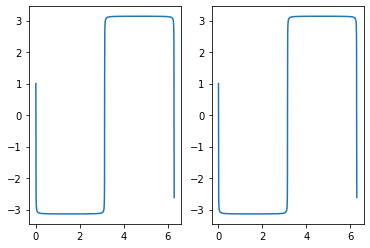

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(u1,u2):
    return np.array([-100*np.cos(u2)*(u1**2-np.pi**2)**2/(u1**2+np.pi**2)/np.sqrt(1+(100*np.cos(u2)*(u1**2-np.pi**2)**2/(u1**2+np.pi**2))**2),1/np.sqrt(1+(100*np.cos(u2)*(u1**2-np.pi**2)**2/(u1**2+np.pi**2))**2)])
def df(u1,u2):
    f = -100*np.cos(u2)*(u1**2-np.pi**2)**2/(u1**2+np.pi**2)
    f1 = -100*np.cos(u2)*2*u1*(u1**2-np.pi**2)*(u1**2+3*np.pi**2)/(u1**2+np.pi**2)**2
    g = np.sqrt(1+(100*np.cos(u2)*(u1**2-np.pi**2)**2/(u1**2+np.pi**2))**2)
    g1 = (-(40000*u1*(-np.pi**2 + u1**2)**4*(np.cos(u2))**2)/(np.pi**2+u1**2)**3 + (80000*u1*(-np.pi**2+u1**2)**3*(np.cos(u2))**2)/(np.pi**2+u1**2)**2)/(2*np.sqrt(1+(10000*(-np.pi**2+u1**2)**4*(np.cos(u2))**2)/(np.pi**2+u1**2)**2))
    x1 = (f1*g-g1*f)/g**2
    
    f1 = 100*np.sin(u2)*(u1**2-np.pi**2)**2/(u1**2+np.pi**2)
    g1 = -(10000*(-np.pi**2+u1**2)**4*np.cos(u2)*np.sin(u2))/((np.pi**2+u1**2)**2*np.sqrt(1+(10000*(-np.pi**2+u1**2)**4*(np.cos(u2))**2)/(np.pi**2+u1**2)**2))
    x2 = (f1*g-g1*f)/g**2
            
    f = 1
    f1 = 0
    y2 = (f1*g-g1*f)/g**2
      
    g1 = (-(40000*u1*(-np.pi**2 + u1**2)**4*(np.cos(u2))**2)/(np.pi**2+u1**2)**3 + (80000*u1*(-np.pi**2+u1**2)**3*(np.cos(u2))**2)/(np.pi**2+u1**2)**2)/(2*np.sqrt(1+(10000*(-np.pi**2+u1**2)**4*(np.cos(u2))**2)/(np.pi**2+u1**2)**2))
    y1 = (f1*g-g1*f)/g**2
    return np.matrix([[x1,x2],[y1,y2]])
    
N = 5
a = 1
norm = []
while N!=20480:
    tau = 7*np.pi/(N-1)
    u = np.zeros((N,2))
    u[0,0] = 1
    E = np.eye(2)
    for i in range(N-1):
        matr = E + a*tau*df(u[i,0],u[i,1])
        k = np.dot(matr,f(u[i,0],u[i,1]))
        k = np.array(k)
        u[i+1] = u[i] + tau*k

    x = u[:,1]
    lambdaa = 1/(1-np.pi**2)+ 10**2*np.sin(x)
    y = -2*lambdaa*np.pi**2/(1+np.sqrt(1+4*np.pi**2*(lambdaa)**2))
    fig, ax = plt.subplots(1,2)
    ax[0].plot(u[:,1],u[:,0])
    ax[1].plot(x,y)
    norm.append(np.sqrt(tau*sum((u[:,0]-y)**2)))
    print(norm[-1])
    print(N)
    N = N * 2


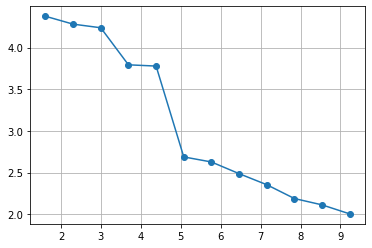

In [2]:
N = [np.log(5*2**i) for i in range(12)]
plt.plot(N, np.log(norm), marker="o")
plt.grid(True)